In [11]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/ce/25/a557ee10ac9dce1300850024707ce1850a6958f1673a9194be878b99d631/matplotlib-3.8.2-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/5b/ac/26fa1057f62beaa2af4c55c6ac733b114a403b746cfe0ce3dc6e4aec921a/contourpy-1.2.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/14/f9/14494b9b440a8ab0b8746d0c65b25c2a5ba22ed9a946d0895e2e4f39d06f/fonttools-4.47.0-cp311-cp311-macosx_10_9_universal2.whl.metadata

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip


In [3]:
import pandas as pd

df = pd.read_csv('../sim_city/sim_city_results.csv')

df

,time,time_sim,age_sim,hour_sim,arm_selected,reward
0,2024-01-10 21:14:16,2024-01-11 10:00:55,76,10,option1,0
1,2024-01-10 21:14:16,2024-01-12 07:00:55,106,7,option3,0
2,2024-01-10 21:14:16,2024-01-11 03:00:29,48,3,option3,1
3,2024-01-10 21:14:16,2024-01-11 23:00:18,32,23,option1,0
4,2024-01-10 21:14:16,2024-01-12 07:00:00,20,7,option1,0
...,...,...,...,...,...,...
17367,2024-01-10 21:19:44,2024-01-11 12:00:53,86,12,option3,1
17368,2024-01-10 21:19:44,2024-01-12 10:00:51,93,10,option2,0
17369,2024-01-10 21:19:44,2024-01-11 18:00:40,56,18,option1,0
17370,2024-01-10 21:19:44,2024-01-11 06:00:20,22,6,option1,1


            age_sim      hour_sim        reward
count  17372.000000  17372.000000  17372.000000
mean      59.215692     11.451589      0.530163
std       34.837720      6.884452      0.499104
min        0.000000      0.000000      0.000000
25%       29.000000      5.000000      0.000000
50%       59.000000     11.000000      1.000000
75%       90.000000     17.000000      1.000000
max      119.000000     23.000000      1.000000
                      time             time_sim  age_sim  hour_sim  \
0      2024-01-10 21:14:16  2024-01-11 10:00:55       76        10   
1      2024-01-10 21:14:16  2024-01-12 07:00:55      106         7   
2      2024-01-10 21:14:16  2024-01-11 03:00:29       48         3   
3      2024-01-10 21:14:16  2024-01-11 23:00:18       32        23   
5      2024-01-10 21:14:16  2024-01-11 08:00:18       31         8   
...                    ...                  ...      ...       ...   
17365  2024-01-10 21:19:44  2024-01-12 16:00:41      105        16   
17367  2

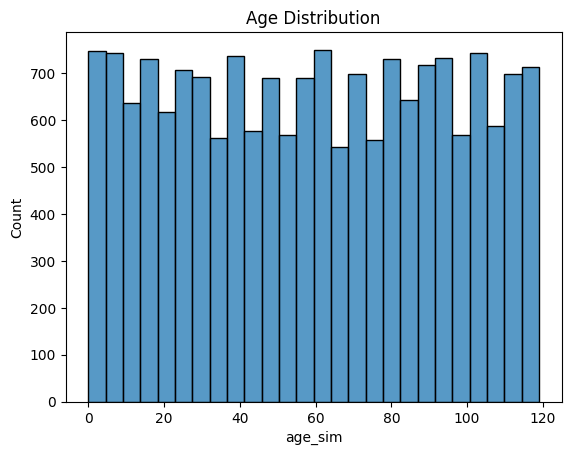

In [12]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

# Filter data
filtered_data = df[df['age_sim'] > 30]
print(filtered_data)

# Visualization (assuming you have matplotlib or seaborn installed)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot age distribution
sns.histplot(df['age_sim'])
plt.title('Age Distribution')
plt.show()

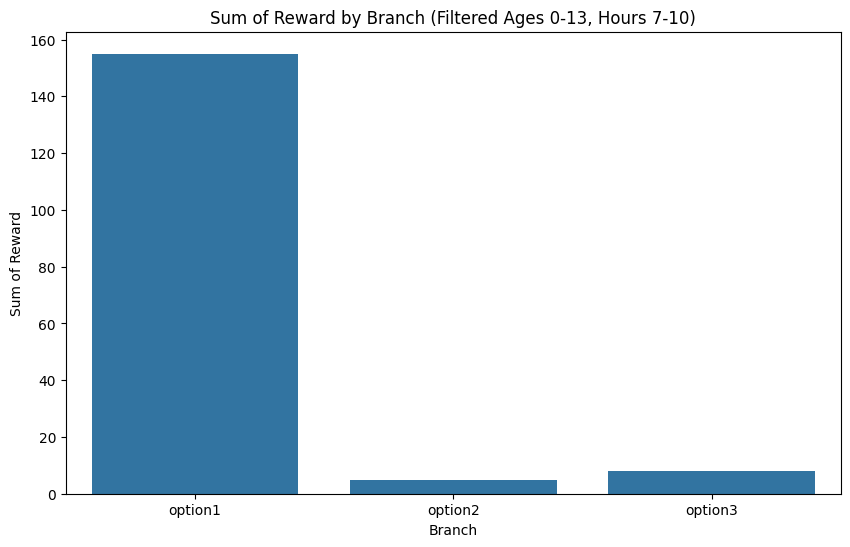

In [13]:
filtered_data = df[(df['age_sim'] >= 0) & (df['age_sim'] <= 13) & (df['hour_sim'] >= 7) & (df['hour_sim'] <= 10)]

grouped_data = filtered_data.groupby('arm_selected')['reward'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='arm_selected', y='reward', data=grouped_data)
plt.title('Sum of Reward by Branch (Filtered Ages 0-13, Hours 7-10)')
plt.xlabel('Branch')
plt.ylabel('Sum of Reward')
plt.show()

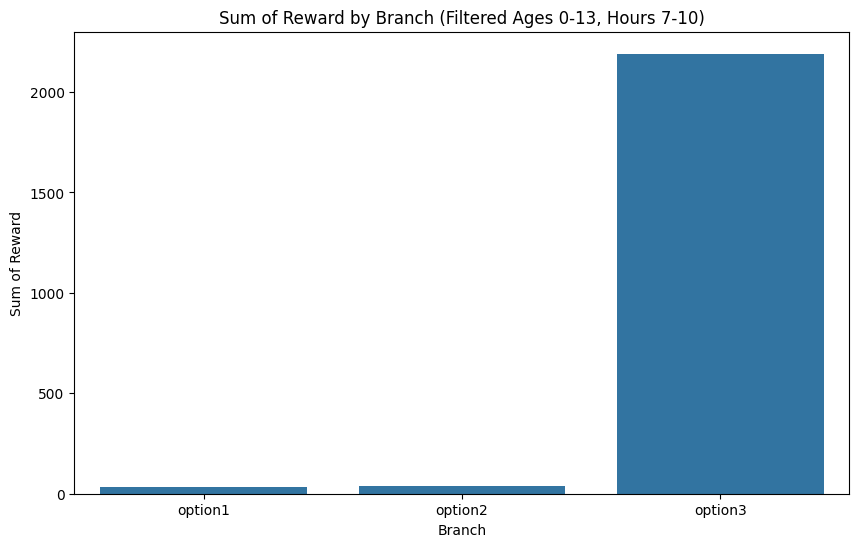

In [15]:
filtered_data = df[(df['age_sim'] >= 25) & (df['age_sim'] <= 50) & (df['hour_sim'] >= 0) & (df['hour_sim'] <= 23)]

grouped_data = filtered_data.groupby('arm_selected')['reward'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='arm_selected', y='reward', data=grouped_data)
plt.title('Sum of Reward by Branch (Filtered Ages 25-50, Hours 0-23)')
plt.xlabel('Branch')
plt.ylabel('Sum of Reward')
plt.show()